In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\P6=Titanic\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now we will drop PassengerId as it is not giving us any information

In [5]:
df=df.drop(columns={"PassengerId"},axis=1)

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])#mode because it is a catagorical data

In [9]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [10]:
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


# EDA

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
objList = df.select_dtypes(include = "object").columns

In [14]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int32  
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    int32  
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int32  
 10  Embarked  891 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 59.3 KB
None


In [15]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,0,3,15,1,35.0,0,0,472,8.0500,47,2


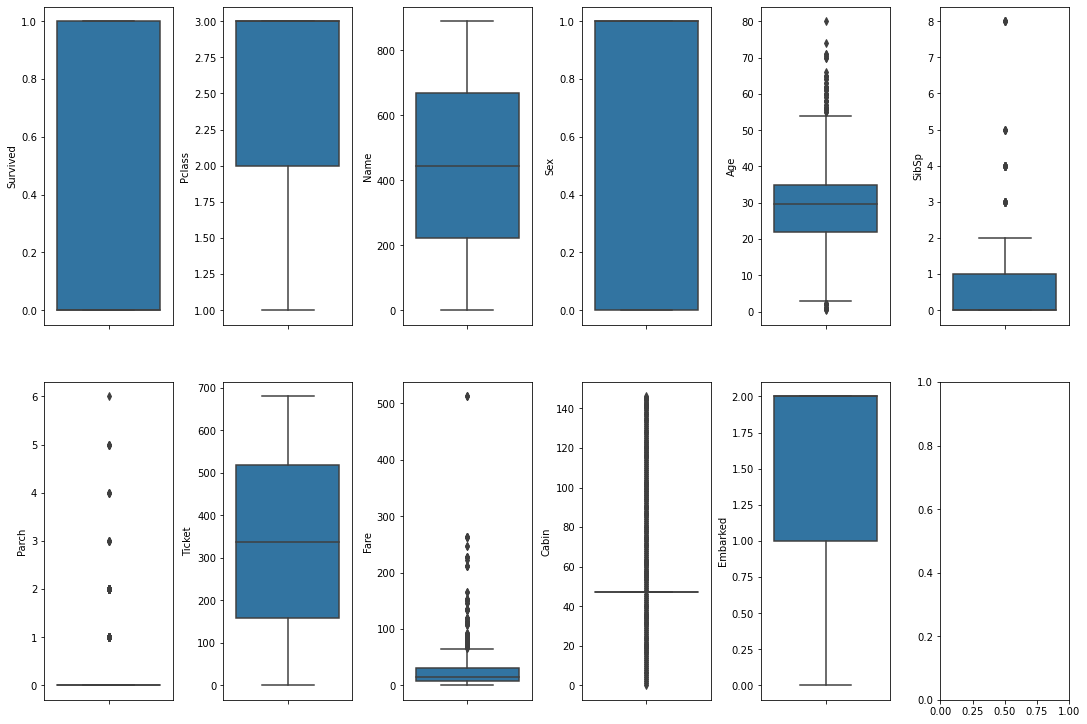

In [16]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

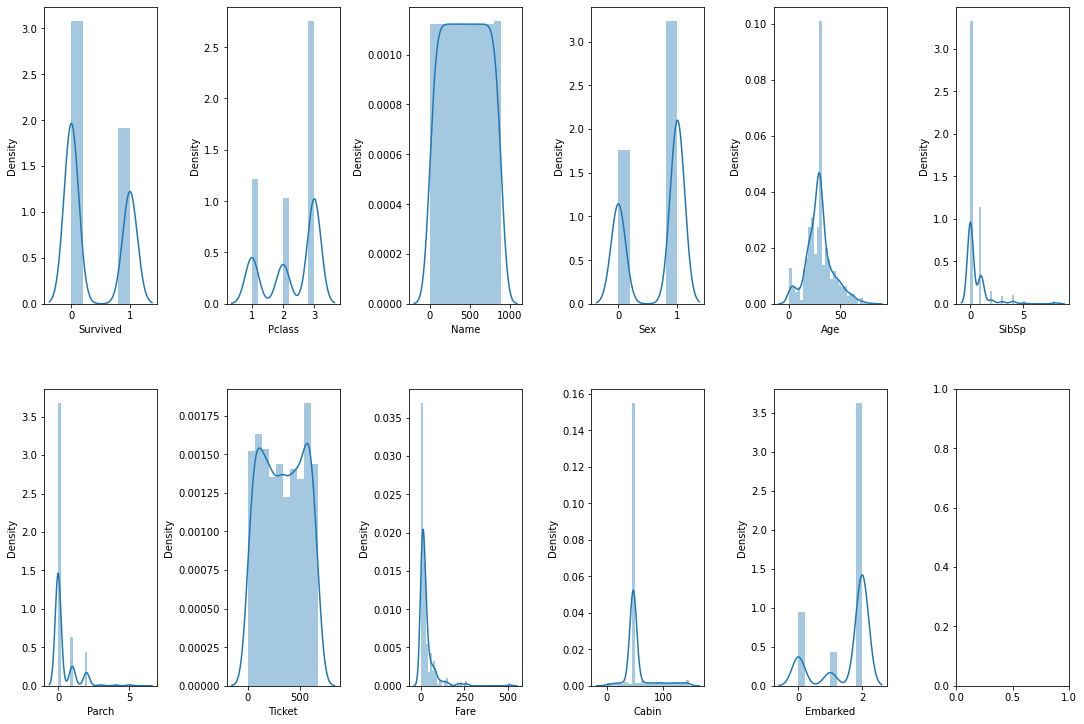

In [17]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:>

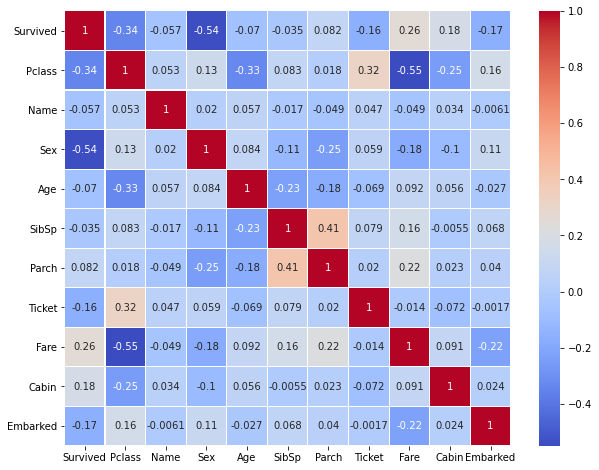

In [18]:
plt.figure(figsize=(10,8))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

We can see that sex and Pclass has a high negetive correlation with our target variable.We have to drop cabin as it has a high correlation with Pclass

In [19]:
df=df.drop(columns={"Cabin"},axis=1)

# Skewness

In [20]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [21]:
from scipy.stats import boxcox

### Pclass

In [22]:
p=boxcox(df["Pclass"])[0]
pd.Series(p).skew()

-0.4819633995748661

In [23]:
df["Pclass"]=p

### SibSp

In [24]:
s=np.sqrt(df["SibSp"])
s.skew()

1.436526474694446

In [25]:
df["SibSp"]=p

### Parch

In [26]:
p=np.sqrt(df["Parch"])
p.skew()

1.5297990732860154

In [27]:
df["Parch"]=p

### Fare

In [28]:
f=np.sqrt(df["Fare"])
f.skew()

2.08500441820235

In [29]:
df["Fare"]=f

# Splitting the data into two one for independent variable and another for dependent variable

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=df.drop("Survived",axis=1)

In [32]:
y=df["Survived"]

# Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Model Selection

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [36]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [37]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 76.23318385650224
CV Score: 77.77540644027367
Diffrence: 1.5422225837714336


In [38]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 76.45739910313901
CV Score: 79.23670830456344
Diffrence: 2.779309201424425


In [39]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 81.39013452914799
CV Score: 83.05693302366454
Diffrence: 1.6667984945165557


In [40]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 80.04484304932735
CV Score: 78.7910363442345
Diffrence: 1.253806705092856


In [41]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 82.7354260089686
CV Score: 81.36902893729207
Diffrence: 1.3663970716765306


# Hyper parameter tuning

In [86]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [87]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [88]:
rf = RandomForestClassifier()

In [89]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [91]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [93]:
y_train_pred=rf_random.predict(X_train)
y_test_pred=rf_random.predict(X_test)

In [94]:
print(accuracy_score(Y_train, y_train_pred))
confusion_matrix(Y_train, y_train_pred)

0.8783783783783784


array([[126,   7],
       [ 20,  69]], dtype=int64)

# Running with Best Parameters

In [95]:
RFC=RandomForestClassifier(n_estimators= 200,
 min_samples_split= 5,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 10,
 bootstrap= True)

In [96]:
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [97]:
y_train_pred=RFC.predict(X_train)
y_test_pred=RFC.predict(X_test)

In [98]:
print(accuracy_score(Y_train, y_train_pred))
confusion_matrix(Y_train, y_train_pred)

0.8918918918918919


array([[128,   5],
       [ 19,  70]], dtype=int64)

# Saving The Model

In [100]:
import joblib
joblib.dump(RFC,r"C:\Users\Avinash\Desktop\Projects\P6=Titanic\titanic.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\P6=Titanic\\titanic.pkl']